In [12]:
%%bash
# extract data set
unzip ~/Workspace/DataMining/Aminer.txt.zip -d ~/Workspace/DataMining/

Archive:  /Users/aman/Workspace/DataMining/Aminer.txt.zip
  inflating: /Users/aman/Workspace/DataMining/AP_train.txt  
   creating: /Users/aman/Workspace/DataMining/__MACOSX/
  inflating: /Users/aman/Workspace/DataMining/__MACOSX/._AP_train.txt  


In [83]:
%%bash 
#print sample data
head /Users/aman/Workspace/DataMining/AP_train.txt

#index 1
#* Book Review: Discover Linux
#@ Marjorie Richardson
#t 1998
#c Linux Journal

#index 2
#* MOSFET table look-up models for circuit simulation
#@ 
#t 1984


In [ ]:
%%bash
# removing the abstact from each file 
# hence reducing the size the one-forth(https://aminer.org/citation )
sed -i '' '/^#!/d' ~/Workspace/DataMining/AP_train.txt

### A. Compute the number of distinct authors, publication venues, publications, and citations/references

In [224]:
%%time
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

file_data = pd.read_csv('/Users/aman/Workspace/DataMining/file_data.csv', header = None, names=["index","title","author","date", "veneue" ],engine='python')
ref_data = pd.read_csv('/Users/aman/Workspace/DataMining/AP_ref.txt', header = None, names=["index","ref"],engine='python')

CPU times: user 38.5 s, sys: 4.59 s, total: 43 s
Wall time: 45.1 s


In [263]:
print 'publication: ',len(file_data.index.unique())
print 'authors: ',len(file_data.author.unique())
print 'veneues: ',len(file_data.veneue.unique())
print 'references: ',ref_data.shape[0]

 publication:  1976816
authors:  1466894
veneues:  255686
references:  7250326


### B.Are these numbers likely to be accurate? As an example look up all the publications venue names associated with the conference “Principles and Practice of Knowledge Discovery in Databases”13 – what do you notice?

In [12]:
# %%bash
# grep -A5 '^#\* .*Principles and Practice of Knowledge Discovery in Databases' ~/Workspace/DataMining/AP_train.txt | grep '#\* ' |sort|uniq -c
file_data[file_data['title'].str.contains("Principles and Practice of Knowledge Discovery in Databases", na=False)]
#  there is dis-similarity in titles 

,index,title,author,date,veneue
799732,799734,Proceedings of the 8th European Conference on ...,Jean-François Boulicaut;Floriana Esposito;Fosc...,2004,PKDD '04 Proceedings of the 8th European Confe...
921702,921704,Knowledge Discovery in Databases: PKDD 2006: 1...,Johannes Fürnkranz;Tobias Scheffer;Myra Spilio...,2006,Knowledge Discovery in Databases: PKDD 2006: 1...
936468,936470,Knowledge Discovery in Databases: PKDD 2005: 9...,Alípio Jorge;Luís Torgo;Pavel Brazdil;Rui Cama...,2005,Knowledge Discovery in Databases: PKDD 2005: 9...
1100119,1100122,Proceedings of the 11th European conference on...,Joost N. Kok;Jacek Koronacki;Ramon Lopez De Ma...,2007,PKDD 2007 Proceedings of the 11th European con...
1673542,1673547,Proceedings of the 9th European conference on ...,Alípio Mário Jorge;Luís Torgo;Pavel Brazdil;Ru...,2005,PKDD'05 Proceedings of the 9th European confer...


### C. For each author, construct the list of publications. Plot a histogram of the number of publications per author (use a logarithmic scale on the y axis)

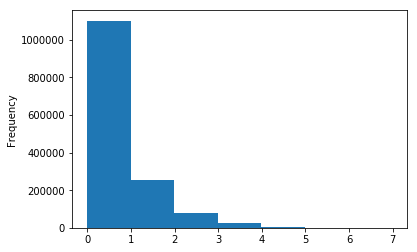

In [8]:
data = pd.read_csv('authors.txt', header = None, names=["count","author_name"])
np.log(data['count']).plot(y='# author',x='num of publication', kind='hist',bins=7)
plt.show()

### D. Calculate the mean and standard deviation of the number of publications per author. Also calculate the Q1 (1st quartile14), Q2 (2nd quartile, or median) and Q3 (3rd quartile) values. Compare the median to the mean and explain the difference between the two values based on the standard deviation and the 1st and 3rd quartiles.

In [9]:
print data["count"].mean()
print data["count"].std()
print data["count"].quantile([0.25,0.5,0.75])

3.3118175466
8.91621491303
0.25    1.0
0.50    1.0
0.75    3.0
Name: count, dtype: float64


### E. Now plot a histogram of the number of publications per venue, as well as calculate the mean, standard deviation, median, Q1, and Q3 values. What is the venue with the largest number of publications in the dataset?

mean:  7.84170835695
std:  84.5815032851
quartiles:
0.25    1.0
0.50    1.0
0.75    1.0
Name: count, dtype: float64
max occurence:  IEEETransationsonInformationTheory


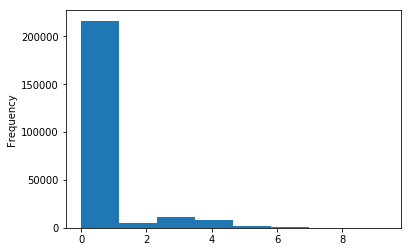

In [226]:
veneue_data = pd.read_csv('veneue.txt', header = None, names=["count","name"])
print 'mean: ', veneue_data["count"].mean()
print 'std: ', veneue_data["count"].std()
print 'quartiles:'
print veneue_data["count"].quantile([0.25,0.5,0.75])
print 'max occurence: ', veneue_data["name"][veneue_data["count"].idxmax()]
veneue_data['count'] = np.log(veneue_data['count'])
veneue_data['count'].plot(kind='hist',bins=8)
plt.show()

### F. Plot a histogram of the number of references (number of publications a publication refers to) and citations (number of publications referring to a publication) per publication. What is the publication with the largest number of references? What is the publication with the largest number of citations? Do these make sense?

references:  719353 772
citaions:  408396 7753
Series([], Name: title, dtype: object)
Series([], Name: title, dtype: object)


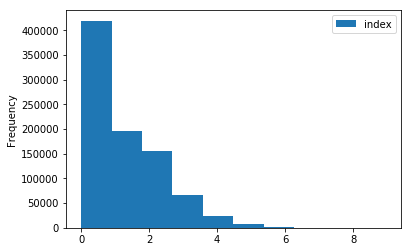

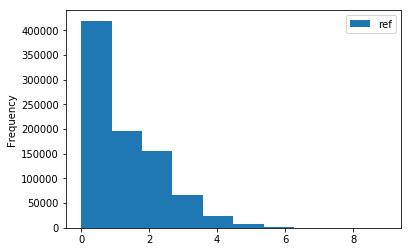

In [289]:
max_ref = ref_data.groupby('index').count().idxmax()[0],ref_data.groupby('index').count().max()[0]
max_cite = ref_data.groupby('ref').count().idxmax()[0],ref_data.groupby('ref').count().max()[0]
df = ref_data.groupby('ref').count().reset_index()
df.columns = ['index','ref']
print 'references: ', max_ref[0],max_ref[1]
print 'citaions: ',max_cite[0],max_cite[1]
print file_data[ file_data['index'] == max_ref[0]]['title']
print file_data[ file_data['index'] == max_cite[0]]['title']
np.log(ref_data.groupby('ref').count()).plot(kind='hist',bins=10)
np.log(df.set_index('index')).plot(kind='hist')
# .set(xlabel="x label", ylabel="y label")
# np.log(ref_data.groupby('index').count().reset_index().set_index('index').divide(df.set_index('index'),axis=0).dropna()).plot(kind='hist')
plt.show()

### G. Calculate the so called “impact” factor for each venue. To do so, calculate the total number of citations for the publications in the venue, and then divide this number by the number of publications for the venue. Plot a histogram of the results

KeyboardInterrupt: 

In [253]:
# p = pd.DataFrame( { 
#     "Name" : ["Alice", "Bob", "Mallory", "Mallory", "Bob" , "Mallory"] , 
#     "City" : ["Seattle", "Seattle", "Portland", "Seattle", "Seattle", "Portland"] } )
# p.groupby('City').get_group('Seattle')['Name'].tolist()

# p.groupby('City').groups.keys()
grouped = file_data.groupby('veneue')
impact_list = dict()
for key in grouped.groups.keys()[1:]:
    impact_list[key] =  grouped.get_group(key)['index'].tolist()

['Portland', 'Seattle']

In [132]:
join_count = joined_data.groupby('veneue').nunique()

In [20]:
join_count.to_csv('/Users/aman/Workspace/DataMining/data_counts_veneue.csv')

/Users/aman/.envs/digit_rec/lib/python2.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


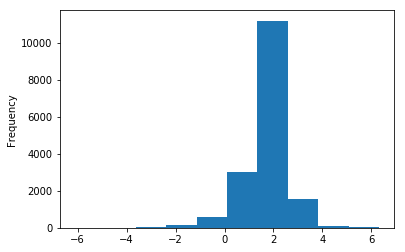

In [145]:
np.log(join_count['ref']/join_count['index']).replace([np.inf, -np.inf], np.nan).dropna().plot(kind='hist')
# 255686
# np.log((join_count[join_count['ref']>0].set_index('veneue')['ref']/join_count[join_count['ref']>0].set_index('veneue')['index'])).plot(kind='hist')
plt.show()

### H. What is the venue with the highest apparent impact factor? Do you believe this number?(http://mdanderson.libanswers.com/faq/26159)

In [160]:
print (join_count['ref']/join_count['index']).max()
print (join_count['ref']/join_count['index']).idxmax()


555.0
555.0
System-on-Chip Test Architectures: Nanometer Design for Testability


7753 Computers and Intractability: A Guide to the Theory of NP-Completeness


/Users/aman/.envs/digit_rec/lib/python2.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in log
  if sys.path[0] == '':


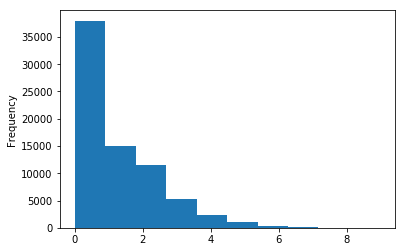

In [257]:
import json
impact_index_list = {}
impact_values_list = {}
with open('data.json', 'r') as f:
    impact_index_list = json.load(f)
with open('data1.json', 'r') as f:
    impact_values_list = json.load(f)
max_impact = max(impact_values_list.values())
index_ = impact_values_list.values().index(max_impact)
key = impact_values_list.keys()[index_]
print max_impact,key
pd.Series(np.log(impact_values_list.values())).replace([np.inf, -np.inf], np.nan).dropna().plot(kind='hist')
plt.show()

### I. Now repeat the calculation from G, but restrict the calculation to venues with at least 10 publications. How does your histogram change? List the citation counts for all publications from the venue with the highest impact factor. How does the impact factor (mean number of citations) compare to the median number of citations?

7753 Computers and Intractability: A Guide to the Theory of NP-Completeness


/Users/aman/.envs/digit_rec/lib/python2.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log
  if __name__ == '__main__':


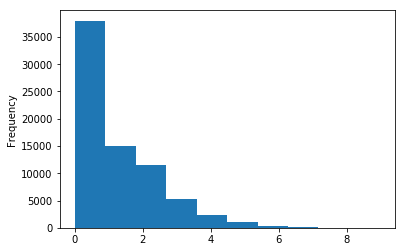

[u'408396']
190551    7753
Name: ref, dtype: int64
7753.0


In [261]:
new_impact_dict = {}
for key in impact_index_list:
    if len(impact_index_list)>10:
        new_impact_dict[key] = impact_values_list[key]
max_impact = max(new_impact_dict.values())
index_ = new_impact_dict.values().index(max_impact)
key = new_impact_dict.keys()[index_]
print max_impact,key
pd.Series(np.log(new_impact_dict.values())).replace([np.inf, -np.inf], np.nan).dropna().plot(kind='hist')
plt.show()             
indexes = impact_index_list[key]
print indexes
df1 = ref_data.groupby('ref').count().reset_index()
df1.columns = ['index','ref']
print df1[df1['index'].isin(indexes)]['ref']
print df1[df1['index'].isin(indexes)]['ref'].mean()


### J. Finally, construct a list of publications for each publication year. Use this list to plot the average number of references and average number of citations per publication as a function of time. Explain the differences you see in the trends.

In [209]:
ref_ =[]
cite_ = []
time = file_data['date'].unique()
time.sort()
for i in time[1:]:
    index = file_data[file_data['date']==i]['index']
    len_ = len(index)*1.0
    if len_:
        ref_.append(1.0*len(ref_data[ref_data['index'].isin(index.tolist())])/len_)
        cite_.append(1.0*len(ref_data[ref_data['ref'].isin(index.tolist())])/len_)
    

CPU times: user 1min 40s, sys: 12.8 s, total: 1min 53s
Wall time: 1min 56s


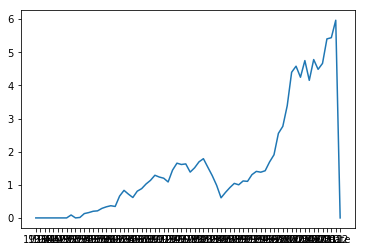

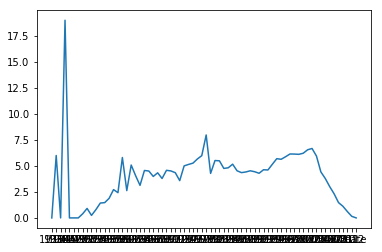

In [220]:
plt.plot(time[1:],ref_)
plt.show()
plt.plot(time[1:],cite_)
plt.show()